# problem 3.5 Try out gradient descent 

Run gradient descent to minimize the function <br> <br>  $g(w) = \frac{1}{50}(w^4 + w^2 + 10w)$ <br> <br> with an initial point $w^0$=2 and 1000 iterations. Make three separate runs using each of the steplength values $\alpha= 1$, $\alpha= 10^-1$ and $\alpha= 10^-2$. Compute the derivative of this function by hand, and implement it. Plot the resulting cost function history plot of each run in a single figure to compare their performance. Which steplegth value works best for this particular function and initial point? 

In [4]:
pip install autograd

Note: you may need to restart the kernel to use updated packages.


In [5]:
# import basic libraries and autograd wrapped numpy
import autograd.numpy as np
import copy
import matplotlib.pyplot as plt
%matplotlib inline

# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
pip install qctrl-visualizer

Note: you may need to restart the kernel to use updated packages.


In [7]:
# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(alpha,max_its,w):
    # cost for this example
    g = lambda w: 1/50*(w**4 + w**2 + 10*w)

    # the gradient function for this example
    grad = lambda w: 1/50*(4*w**3 + 2*w + 10)

    # run the gradient descent loop
    cost_history = [g(w)]        # container for corresponding cost function history
    for k in range(1,max_its+1):
        # evaluate the gradient, store current weights and cost function value
        ## TO DO
        eval_grad = grad(w)

        # take gradient descent step
        ## TO DO
        w = w - alpha * eval_grad

        # collect final weights
        cost_history.append(g(w))
    return cost_history

In [8]:
import qctrlvisualizer as qv
from qctrlvisualizer import plot_cost_histories

<IPython.core.display.Javascript object>


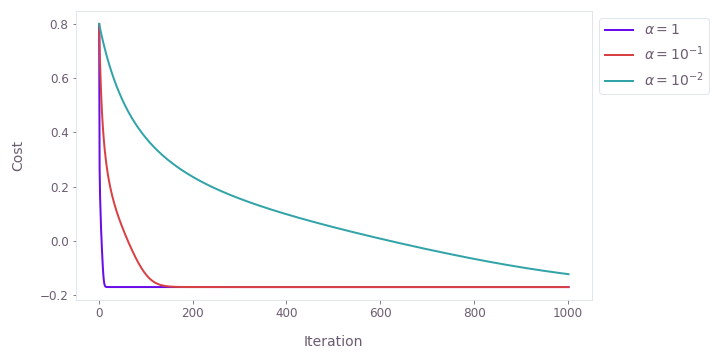

In [9]:
# initial point
w = 2.0
max_its = 1000

# produce gradient descent runs
alpha = 10**(0)
cost_history_1 = gradient_descent(alpha,max_its,w)

alpha = 10**(-1)
cost_history_2 = gradient_descent(alpha,max_its,w)

alpha = 10**(-2)
cost_history_3 = gradient_descent(alpha,max_its,w)

# plot cost function histories
## TO DO
plot_cost_histories(cost_histories=[cost_history_1,cost_history_2,cost_history_3],labels=[r'$\alpha=1$',r'$\alpha=10^{-1}$',r'$\alpha=10^{-2}$'],y_axis_log= False,initial_iteration= 1)



$\alpha = 1$ performs the best

# problem 3.8 Tune fixed steplength for gradient descent

Take the cost function <br><br>  $g(w) = w^Tw$ <br><br> where w is an N = 10 dimensional input vector, and g is convex with a single global minimum at $w = 0_{NX1}$, with three steplength values: $\alpha_1$ = 0.001, $\alpha_2$ = 0.1 and $\alpha_3$ =1. Produce a cost function history plot to compare the three runs and determine which performs the best 

In [12]:
from autograd import grad

In [15]:
def gradient_descent(alpha,max_its,w):
    # cost for this example
    g = lambda w: np.dot(w.T,w)[0][0]

    # the gradient function for this example
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w]         # container for weight function history
    cost_history = [g(w)]        # container for cost function history
    for k in range(1,max_its+1):
        # evaluate the gradient, store current weights and cost function value
        ## TO DO
        eval_grad = gradient(w)

        # take gradient descent step
        ## TO DO
        w = w - alpha * eval_grad

        # collect final weights and costs 
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

<IPython.core.display.Javascript object>


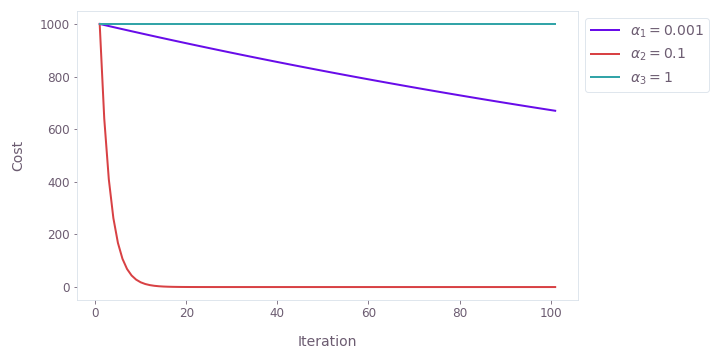

In [25]:
# initial point
N = 10
max_its = 100;
w = 10*np.ones((N,1));

# produce gradient descent runs
alpha = 0.001; 
weight_history_1,cost_history_1 = gradient_descent(alpha,max_its,w)

alpha = 0.1; 
weight_history_2,cost_history_2 = gradient_descent(alpha,max_its,w)

alpha = 1; 
weight_history_3,cost_history_3 = gradient_descent(alpha,max_its,w)

# plot cost function histories
## TO DO
plot_cost_histories(cost_histories=[cost_history_1,cost_history_2,cost_history_3],labels=[r'$\alpha_1 = 0.001$',r'$\alpha_2 =0.1$',r'$\alpha_3 = 1$'],y_axis_log= False,initial_iteration= 1)



$\alpha_2$ = 0.1 performs the best

# problem 4.1 Eigenvalues of a Symmetric Matrix 

In this exercise we investigate an alternative approach to checking that the eigenvalues of an NXN symmetric matrix C (e.g., a Hessian matrix) are all non-negative. This approach does not involve explicitly computing the eigenvalues themselves, and is significantly easier to employ in practice. 

a) Let C be an NXN symmetric matrix. Show that if C has all nonnegative eigenvalues then the quantity $z^TCz$ $\geq$ 0 for all z

Since C is symmetric, we can find an orthonormal basis of eigenvectors $v^1,..,v^N$ with eigenvalues $\lambda_1,..\lambda_N$. Putting all these orthonormal basis as columns to form an orthogonal matrix P, we have $P^T C P = D$ where D is the diagonal matrix with eigenvalues $\lambda_1,..\lambda_N$ as its entries. <br>
$z = y_1v^1 + ..+ y_Nv^N = Py$ <br>
<br>
$z^TCz = y^TP^TCPy$ <br>
= $y^TDy$<br>
= $\sum^N_{i=1} \lambda_iy_i^2$ 

this is a sum of squares which are non-negative multiplied by non-negative eigenvalues which means $z^TCz$ $\geq$ 0

b) Show the converse. That is, if an NXN symmetric matrix C satisfies $z^TCz \geq 0$ for all z then it must have all non negative eigenvalues 


$z^TCz$ $>$ 0 and Cz = $\lambda$z <br>
$z^TCz = z^T\lambda z = \lambda > 0$ 
here $z^Tz = I$  since they are orthonormal. 
for the case z = 0, eigenvalue is also 0 satisfying $\lambda \geq 0$

c) Use this method to verify that the second-order definition of convexity holds for the quadratic function <br>
 g(w) = $ a + b^Tw +w^TCw
 
 where a = 1, $b = \begin{bmatrix} 1 & 1 \end{bmatrix}^T $ and C = $\begin{bmatrix} 1 & 1 \\ 1 & 1 \end{bmatrix}$

eigenvalue equation: 0 = (1-$\lambda)^2-1$ giving eigenvalues of C, $\lambda$ = 0,2 both are non-negative so C is positive semidefinite and g is convex. 

d)Show that the eigenvalues of C + $\lambda I _{NXN}$ can all be made to be positive by setting $\lambda$ large enough. What is the smallest value of $\lambda$ that will make this happen?

C + $\lambda I _{NXN}$ = $PDP^T$ + $\lambda P P^T$ = $\sum^N_{i=1} \lambda_i(v_n v_n^T)$ +$\sum^N_{i=1}(v_n v_n^T)\lambda$ <br>
$z^T (C + \lambda I _{NXN})z =\sum^N_{i=1} (v_n^Tz)^2(\lambda_i +\lambda)$. So we need $\lambda$ such that $(\lambda_i +\lambda) \geq 0$ to make the expression positive. The smallest eigenvalue of C which is 0 can be used to make C + $\lambda I _{NXN}$ positive

# problem 4.5 Newton's Method II

a) Use th first-order optimality condition to determine the unique stationary point of the function $g(w) = log(1+ e^{w^Tw})$ where w is two-dimensional. (i.e. N=2) 

To determine the statinonary point, we set the gradient to 0 <br>
$\nabla g(w) = \frac{2e^{w^Tw}}{1+e^{w^Tw}}w = 0_{NX1}$ <br>
Since the scalar coefficient $\frac{2e^{w^Tw}}{1+e^{w^Tw}} \geq 1 $ the equaly holds only for $w = 0_{NX1}$ 

b)Use the second-order definition of convexity to verify that g(w) is convex, implying that the stationary point found in part(a) is a global minimum.

$\nabla^2 g(w) = \frac{4e^{w^Tw}}{(1+e^{w^Tw})^2}ww^T +\frac{2e^{w^Tw}}{1+e^{w^Tw}}I_{NXN}$ <br>
<br>
$z^T\nabla^2 g(w)z = z^T (\frac{4e^{w^Tw}}{(1+e^{w^Tw})^2}ww^T +\frac{2e^{w^Tw}}{1+e^{w^Tw}}I_{NXN})z$ <br>
$=z^T \frac{4e^{w^Tw}}{(1+e^{w^Tw})^2}ww^T z + z^T \frac{2e^{w^Tw}}{1+e^{w^Tw}}I_{NXN}z$<br>
$=\frac{4e^{w^Tw}}{(1+e^{w^Tw})^2}z^Tww^T z + \frac{2e^{w^Tw}}{1+e^{w^Tw}}z^Tz$ <br>
$=\frac{4e^{w^Tw}}{(1+e^{w^Tw})^2}(z^Tw)^2+\frac{2e^{w^Tw}}{1+e^{w^Tw}}\lvert z \rvert^2$ <br> 
<br>
Since all the terms in the above expression are positive regardless of the z or w chosen, $z^T\nabla^2 g(w)z \geq 0$ so by the second order definition of convexity, g is convex. 

c)Perform Newton's method to find the minimum of the function g(w) determined in part (a). Initialize your alogithm at $w^0 = 1_{NXN}$ and make a plot of the cost function history for ten iterations of Newton's method in order to verify that your algorithm works properly and is converging. 

In [31]:
from autograd import hessian

In [36]:
def newtons_method(g,max_its,w,**kwargs):
    # compute gradient module using autograd
    gradient = grad(g)
    hess = hessian(g)
   
    epsilon = 10**(-10)
    if 'epsilon' in kwargs:
        epsilon = kwargs['epsilon']
        
    # run the newtons method loop
    weight_history = [w] # container for weight history
    cost_history = [g(w)] # container for corresponding cost function history
    for k in range(max_its):
        # evaluate the gradient and hessian 
        eval_grad = gradient(w)
        eval_hess = hess(w)
        # reshape hessian to square matrix 
        eval_hess.shape = (int((np.size(eval_hess))**(0.5)),int((np.size(eval_hess))**(0.5)))
        # solve second order system system for weight update
        A = eval_hess+ epsilon*np.eye(w.size)
        b = eval_grad
        w = np.linalg.solve(A,np.dot(A,w) - b)
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w)) 
    return weight_history,cost_history

In [43]:
g = lambda w: np.log(1 + np.exp(np.dot(w.T,w)));
w = np.ones((2,)); 
max_its = 10;
weight_history,cost_history = newtons_method(g,max_its,w)

<IPython.core.display.Javascript object>


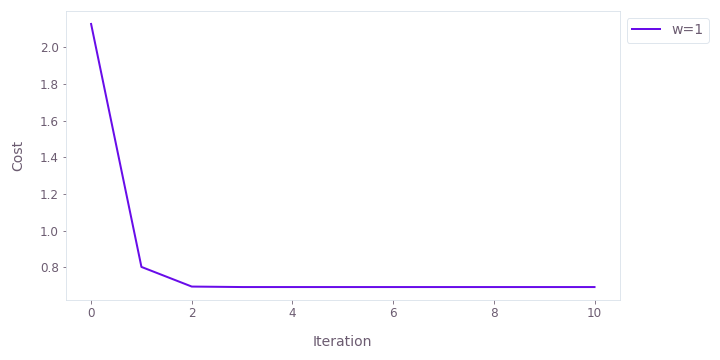

In [45]:
plot_cost_histories(cost_histories=[cost_history],labels=['w=1'],y_axis_log= False,initial_iteration= 0)

d) Now run your Newton's method code from part (c) again, this time initializing at the point $w^0 = 4.1_{NXN}$. While this initialization is further away from the unique minimum of g(w) than the one used in part (c) your Newton's method algorithm should converge faster starting at this point. Explain why this result makes sense for the particular function g(w) we are minimizing here. 

<IPython.core.display.Javascript object>


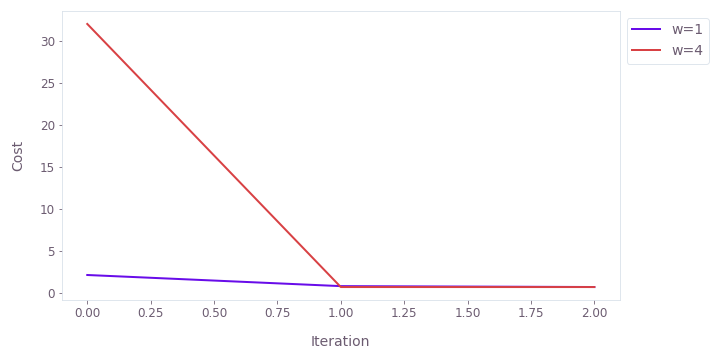

In [49]:
w = np.ones((2,)); 
max_its = 2;
weight_history,cost_history_1 = newtons_method(g,max_its,w)

w = 4*np.ones((2,)); 
max_its = 2;
weight_history_2,cost_history_2 = newtons_method(g,max_its,w)

plot_cost_histories(cost_histories=[cost_history_1,cost_history_2],labels=['w=1','w=4'],y_axis_log= False,initial_iteration= 0)
